# <font color=blue>Assignments for "Understanding The Relationship"</font>

To close out this lesson, you're going to do three assignments. For the first assignment, you'll write up a short answer to a question in a Gist file.  For the second two assignments, you'll do your work in Jupyter notebooks, and you should link to those notebooks in the same Gist file.

Please submit a single Gist file containing the answer to first assignment, plus links for second two.

## 1. Interpretion and signficance

Suppose that we would like to know how much families in the US are spending on recreation annually. We estimated the following model:

$$ expenditure = 873 + 0.0012annual\_income + 0.00002annual\_income^2 - 223.57have\_kids $$

*expenditure* is the annual spending on recreation in US dollars, *annual_income* is the annual income in US dollars and *have_kids* is a dummy variable indicating the families with children. Interpret the estimated coefficients. What additional statistics should be given in order to make sure that your interpretations make sense statistically. Write up your answer and save in a Gist. 

According to our results, a one point increase in Expenditure results in a 0.00012 greater increase for annual income. 
That means each 100000 dollars increase in Expenditure increase will cause an increase of 12 dollars in annual income.
Also if you are a family with children we expect less expenditure value for you.

## 2. Weather model

In this exercise, you'll work with the historical temperature data from the previous lesson. To complete this assignment, submit a link in the gist file to the Jupyter notebook containing your solutions to the following tasks:

- First, load the dataset from the **weatherinszeged** table from Kaggle.
- Build a linear regression model where your target variable is the difference between the *apparenttemperature* and the *temperature*. As explanatory variables, use *humidity* and *windspeed*. Now, estimate your model using OLS. Are the estimated coefficients statistically significant? Are the signs of the estimated coefficients in line with your previous expectations? Interpret the estimated coefficients. What are the relations between the target and the explanatory variables? 
- Next, include the interaction of *humidity* and *windspeed* to the model above and estimate the model using OLS. Are the coefficients statistically significant? Did the signs of the estimated coefficients for *humidity* and *windspeed* change? Interpret the estimated coefficients.

In [1]:
import pandas as pd
import pandas_profiling as pp
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import linear_model
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import jarque_bera
from scipy.stats import normaltest
from scipy.stats import bartlett
from scipy.stats import levene
from sklearn.preprocessing import PolynomialFeatures


In [2]:
title_font = {'family': 'arial', 'color': 'darkred','weight': 'bold','size': 13 }
eksen_font  = {'family': 'arial', 'color': 'darkblue','weight': 'bold','size': 10 }

In [3]:
pd.set_option('display.max_columns', 500)
df = pd.read_csv('/Users/melisademir/Desktop/Reg_Assign_1/weather.csv', encoding="ISO-8859-1", low_memory=False)
df.tail(10)

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
96443,2016-09-09 14:00:00.000 +0200,Partly Cloudy,rain,30.894444,29.450000,0.28,14.7798,43.0,15.5526,0.0,1014.66,Partly cloudy starting in the morning.
96444,2016-09-09 15:00:00.000 +0200,Partly Cloudy,rain,31.083333,29.616667,0.28,15.5043,40.0,16.1000,0.0,1014.17,Partly cloudy starting in the morning.
96445,2016-09-09 16:00:00.000 +0200,Partly Cloudy,rain,31.083333,29.611111,0.28,13.8943,40.0,16.1000,0.0,1013.97,Partly cloudy starting in the morning.
96446,2016-09-09 17:00:00.000 +0200,Partly Cloudy,rain,30.766667,29.311111,0.28,14.2163,24.0,15.5526,0.0,1013.83,Partly cloudy starting in the morning.
96447,2016-09-09 18:00:00.000 +0200,Partly Cloudy,rain,28.838889,27.850000,0.32,12.2038,21.0,16.1000,0.0,1014.07,Partly cloudy starting in the morning.
96448,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,Partly cloudy starting in the morning.
96449,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,Partly cloudy starting in the morning.
96450,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,Partly cloudy starting in the morning.
96451,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,Partly cloudy starting in the morning.
96452,2016-09-09 23:00:00.000 +0200,Partly Cloudy,rain,20.438889,20.438889,0.61,5.8765,39.0,15.5204,0.0,1016.16,Partly cloudy starting in the morning.


In [4]:
display(df.isnull().sum().sort_values(ascending=False))

Precip Type                 517
Daily Summary                 0
Pressure (millibars)          0
Loud Cover                    0
Visibility (km)               0
Wind Bearing (degrees)        0
Wind Speed (km/h)             0
Humidity                      0
Apparent Temperature (C)      0
Temperature (C)               0
Summary                       0
Formatted Date                0
dtype: int64

In [5]:
df = df.drop('Precip Type', axis =1)

In [6]:
display(df.isnull().sum().sort_values(ascending=False))

Daily Summary               0
Pressure (millibars)        0
Loud Cover                  0
Visibility (km)             0
Wind Bearing (degrees)      0
Wind Speed (km/h)           0
Humidity                    0
Apparent Temperature (C)    0
Temperature (C)             0
Summary                     0
Formatted Date              0
dtype: int64

In [7]:
df['difference'] =  df['Temperature (C)'] - df['Apparent Temperature (C)']
df['difference']

0        2.083333
1        2.127778
2        0.000000
3        2.344444
4        1.777778
           ...   
96448    0.000000
96449    0.000000
96450    0.000000
96451    0.000000
96452    0.000000
Name: difference, Length: 96453, dtype: float64

In [8]:
Y = df['difference'] #target
X = df[['Wind Speed (km/h)', 'Humidity']]

In [9]:
lrm = linear_model.LinearRegression()
lrm.fit(X, Y)

LinearRegression()

In [10]:
# Inspect the results.
print('\nCoefficients: \n', lrm.coef_)
print('\nIntercept: \n', lrm.intercept_)


Coefficients: 
 [0.11929075 3.02918594]

Intercept: 
 -2.4381054151876964


In [11]:
predictions = lrm.predict(df[['Wind Speed (km/h)', 'Humidity']])

In [12]:
predictions = lrm.predict(X)
errors = Y - predictions

print("Mean of the errors in the temperature model is: {}".format(np.mean(errors))) 

Mean of the errors in the temperature model is: -6.460065405497246e-16


In [13]:
bart_stats = bartlett(predictions, errors)
lev_stats = levene(predictions, errors)

print("Bartlett test statistic value is {0:3g} and p value is {1:.3g}".format(bart_stats[0], bart_stats[1]))
print("Levene test statistic value is {0:3g} and p value is {1:.3g}".format(lev_stats[0], lev_stats[1]))

Bartlett test statistic value is 19150.8 and p value is 0
Levene test statistic value is 14884.8 and p value is 0


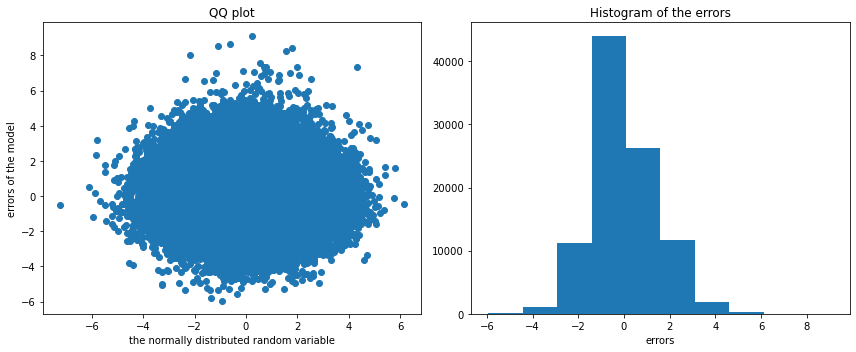

In [14]:
rand_nums = np.random.normal(np.mean(errors), np.std(errors), len(errors))

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.scatter(rand_nums, errors)
plt.xlabel("the normally distributed random variable")
plt.ylabel("errors of the model")
plt.title("QQ plot")

plt.subplot(1,2,2)
plt.hist(errors)
plt.xlabel("errors")
plt.title("Histogram of the errors")

plt.tight_layout()
plt.show()

In [15]:
jb_stats = jarque_bera(errors)
norm_stats = normaltest(errors)

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

Jarque-Bera test statistics is 4613.310875507194 and p value is 0.0
Normality test statistics is 3935.7465185763444 and p value is 0.0


In [16]:
X = sm.add_constant(X)
sonuclar = sm.OLS(Y, X).fit()
sonuclar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             difference   R-squared:                       0.288
Model:                            OLS   Adj. R-squared:                  0.288
Method:                 Least Squares   F-statistic:                 1.949e+04
Date:                Fri, 25 Sep 2020   Prob (F-statistic):               0.00
Time:                        02:44:27   Log-Likelihood:            -1.7046e+05
No. Observations:               96453   AIC:                         3.409e+05
Df Residuals:                   96450   BIC:                         3.409e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -2.4381      0.021   -115.948      0.000      -2.479      -2.397
Wind Speed (km/h)     0.1193      0.001    176.164      0.000       0.118       0.121
Humidity              3.0292      0.024    126.479      0.000       2.982       3.076
==============================================================================
Omnibus:                     3935.747   Durbin-Watson:                   0.264
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4613.311
Skew:                           0.478   Prob(JB):                         0.00
Kurtosis:                       3.484   Cond. No.                         88.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

expenditure= -2.4381 + 0.1193*Wind Speed (km/h) + 3.0292*Humidity

In [17]:
Y1 = df['difference']
df['wind_hum'] = df['Wind Speed (km/h)'] * df['Humidity']
X1 = df[['Wind Speed (km/h)', 'Humidity', 'wind_hum' ]]

X1 = sm.add_constant(X1)

sonuclar = sm.OLS(Y1, X1).fit()
sonuclar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             difference   R-squared:                       0.341
Model:                            OLS   Adj. R-squared:                  0.341
Method:                 Least Squares   F-statistic:                 1.666e+04
Date:                Fri, 25 Sep 2020   Prob (F-statistic):               0.00
Time:                        02:44:28   Log-Likelihood:            -1.6669e+05
No. Observations:               96453   AIC:                         3.334e+05
Df Residuals:                   96449   BIC:                         3.334e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0839      0.033     -2.511      0.012      -0.149      -0.018
Wind Speed (km/h)    -0.0905      0.002    -36.797      0.000      -0.095      -0.086
Humidity             -0.1775      0.043     -4.133      0.000      -0.262      -0.093
wind_hum              0.2971      0.003     88.470      0.000       0.291       0.304
==============================================================================
Omnibus:                     4849.937   Durbin-Watson:                   0.262
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9295.404
Skew:                           0.378   Prob(JB):                         0.00
Kurtosis:                       4.320   Cond. No.                         193.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

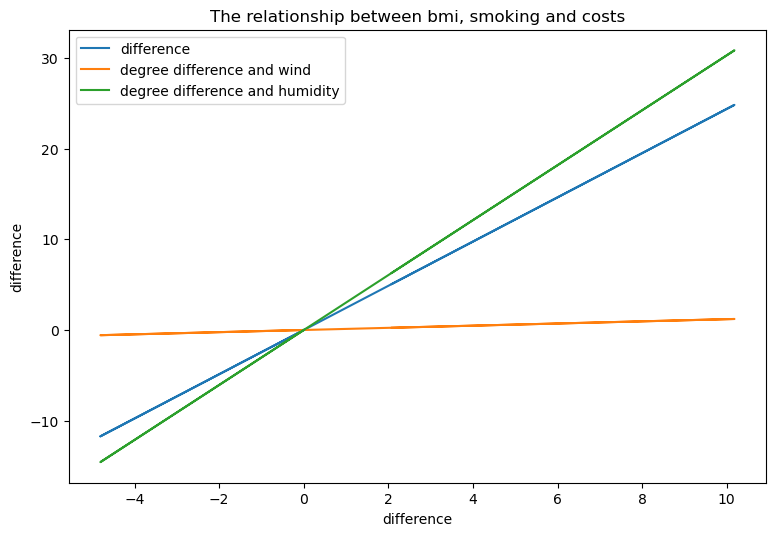

In [18]:

plt.figure(figsize=(9,6), dpi = 100)

costs_difference = df.difference * 2.4381
costs_difference_Wind = df.difference * 0.1193
costs_difference_Humidity = df.difference * 3.0292


plt.plot(df.difference, costs_difference)
plt.plot(df.difference, costs_difference_Wind)
plt.plot(df.difference, costs_difference_Humidity)
plt.legend(["difference", "degree difference and wind ", "degree difference and humidity"])
plt.xlabel("difference")
plt.ylabel("difference")
plt.title("The relationship between bmi, smoking and costs")

plt.show()

In [19]:
#pf = PolynomialFeatures(degree=4)
#pf.fit(X.head())

In [20]:
#X_pf = pf.transform(X.head())
#X_pf_df = pd.DataFrame(X_pf, columns = pf.get_feature_names(X.columns))
#X_pf_df

In [21]:
#X_pf_df = sm.add_constant(X_pf_df)
#X_pf_df

In [22]:
#results = sm.OLS(Y,X_pf_df).fit()
#results.summary()

##  3. House prices model

In this exercise, you'll interpret your house prices model. To complete this assignment, submit a link in the gist file to the Jupyter notebook containing your solutions to the following tasks:

- Load the **houseprices** data from Kaggle.
- Run your house prices model again and interpret the results. Which features are statistically significant and which are not?
- Now, exclude the insignificant features from your model. Did anything change?
- Interpret the statistically significant coefficients by quantifying their relations with the house prices. Which features have more prominent effect on the house prices?
- Do the results sound reasonable to you? If not, try to explain the potential reasons.

In [23]:
pd.set_option('display.max_columns', 500)
house = pd.read_csv('/Users/melisademir/Desktop/Reg_Assign_1/house.csv', encoding="ISO-8859-1", low_memory=False)
house.tail(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1450,1451,90,RL,60.0,9000,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,NAmes,Norm,Norm,Duplex,2Story,5,5,1974,1974,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,Gd,TA,No,Unf,0,Unf,0,896,896,GasA,TA,Y,SBrkr,896,896,0,1792,0,0,2,2,4,2,TA,8,Typ,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,Y,32,45,0,0,0,0,NaN,NaN,NaN,0,9,2009,WD,Normal,136000
1451,1452,20,RL,78.0,9262,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2008,2009,Gable,CompShg,CemntBd,CmentBd,Stone,194.0,Gd,TA,PConc,Gd,TA,No,Unf,0,Unf,0,1573,1573,GasA,Ex,Y,SBrkr,1578,0,0,1578,0,0,2,0,3,1,Ex,7,Typ,1,Gd,Attchd,2008.0,Fin,3,840,TA,TA,Y,0,36,0,0,0,0,NaN,NaN,NaN,0,5,2009,New,Partial,287090
1452,1453,180,RM,35.0,3675,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,TwnhsE,SLvl,5,5,2005,2005,Gable,CompShg,VinylSd,VinylSd,BrkFace,80.0,TA,TA,PConc,Gd,TA,Gd,GLQ,547,Unf,0,0,547,GasA,Gd,Y,SBrkr,1072,0,0,1072,1,0,1,0,2,1,TA,5,Typ,0,NaN,Basment,2005.0,Fin,2,525,TA,TA,Y,0,28,0,0,0,0,NaN,NaN,NaN,0,5,2006,WD,Normal,145000
1453,1454,20,RL,90.0,17217,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,1140,1140,GasA,Ex,Y,SBrkr,1140,0,0,1140,0,0,1,0,3,1,TA,6,Typ,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,Y,36,56,0,0,0,0,NaN,NaN,NaN,0,7,2006,WD,Abnorml,84500
1454,1455,20,FV,62.0,7500,Pave,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,7,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,No,GLQ,410,Unf,0,811,1221,GasA,Ex,Y,SBrkr,1221,0,0,1221,1,0,2,0,2,1,Gd,6,Typ,0,NaN,Attchd,2004.0,RFn,2,400,TA,TA,Y,0,113,0,0,0,0,NaN,NaN,NaN,0,10,2009,WD,Normal,185000
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,Y,FuseA,1078,0,0,1078,1,0,1,0,2,1,Gd,5,Typ,0,NaN,Attchd,1950.0,Unf,1,240,TA,TA,Y,366,0,112,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,6,1965,1965,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,CBlock,TA,TA,No,BLQ,830,LwQ,290,1

In [24]:
missing_value_percent = house.isnull().sum()/house.shape[0] * 100
missing_value_percent.sort_values(ascending=False)

PoolQC           99.520548
MiscFeature      96.301370
Alley            93.767123
Fence            80.753425
FireplaceQu      47.260274
                   ...    
CentralAir        0.000000
SaleCondition     0.000000
Heating           0.000000
TotalBsmtSF       0.000000
Id                0.000000
Length: 81, dtype: float64

In [25]:
null_value_clm_greater_20 = missing_value_percent[missing_value_percent > 20].keys()
null_value_clm_greater_20

Index(['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], dtype='object')

In [26]:
house = house.drop(null_value_clm_greater_20, axis =1)

In [27]:
num_var = house.select_dtypes(include=['int64','float64']).columns
cat_var = house.select_dtypes(include=['object']).columns
missing_col = house.columns[house.isnull().any()]

In [28]:
isnull_per = house.select_dtypes(include=['object']).isnull().mean()*100
miss_vars = isnull_per[isnull_per >0].keys()
miss_vars

Index(['MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Electrical', 'GarageType', 'GarageFinish',
       'GarageQual', 'GarageCond'],
      dtype='object')

In [29]:
for var in miss_vars:
    house[var].fillna(house[var].mode()[0],inplace=True)
    print(var,"=",house[var].mode()[0])

MasVnrType = None
BsmtQual = TA
BsmtCond = TA
BsmtExposure = No
BsmtFinType1 = Unf
BsmtFinType2 = Unf
Electrical = SBrkr
GarageType = Attchd
GarageFinish = Unf
GarageQual = TA
GarageCond = TA


In [30]:
house['LotFrontage'] = house['LotFrontage'].fillna(house['LotFrontage'].median())
house['GarageYrBlt'] = house['GarageYrBlt'].fillna(house['GarageYrBlt'].median())
house['MasVnrArea'] = house['MasVnrArea'].fillna(house['MasVnrArea'].median())

In [31]:
y1 = house['SalePrice']
X1 = house[['1stFlrSF','GrLivArea', 'OverallQual','GarageArea']]
lrm1 = linear_model.LinearRegression()
lrm1.fit(X1, y1)

LinearRegression()

In [32]:
print('coef: \n', lrm.coef_)
print('intercept (bias): \n', lrm.intercept_)

coef: 
 [0.11929075 3.02918594]
intercept (bias): 
 -2.4381054151876964


In [33]:
X1 = sm.add_constant(X1)
results1 = sm.OLS(y1, X1).fit()
results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.753
Method:                 Least Squares   F-statistic:                     1112.
Date:                Fri, 25 Sep 2020   Prob (F-statistic):               0.00
Time:                        02:44:31   Log-Likelihood:                -17522.
No. Observations:                1460   AIC:                         3.505e+04
Df Residuals:                    1455   BIC:                         3.508e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -1.095e+05   4846.037    -22.606      0.000   -1.19e+05      -1e+05
1stFlrSF       31.1968      3.428      9.100      0.000      24.472      37.922
GrLivArea      40.8018      2.679     15.230      0.000      35.547      46.057
OverallQual  2.697e+04   1018.091     26.489      0.000     2.5e+04     2.9e+04
GarageArea     58.9461      6.168      9.557      0.000      46.848      71.045
==============================================================================
Omnibus:                      393.515   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            30592.530
Skew:                          -0.121   Prob(JB):                         0.00
Kurtosis:                      25.424   Cond. No.                     9.73e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.73e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [34]:
y2 = house['SalePrice']
X2 = house[['1stFlrSF','GrLivArea', 'OverallQual','GarageArea', 'LotFrontage', 'TotRmsAbvGrd' ]]
lrm1.fit(X2, y2)

LinearRegression()

In [35]:
X2 = sm.add_constant(X2)
results2 = sm.OLS(y2, X2).fit()
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.754
Model:                            OLS   Adj. R-squared:                  0.753
Method:                 Least Squares   F-statistic:                     741.2
Date:                Fri, 25 Sep 2020   Prob (F-statistic):               0.00
Time:                        02:44:31   Log-Likelihood:                -17521.
No. Observations:                1460   AIC:                         3.506e+04
Df Residuals:                    1453   BIC:                         3.509e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -1.088e+05   6338.421    -17.163      0.000   -1.21e+05   -9.64e+04
1stFlrSF        30.1066      3.545      8.493      0.000      23.153      37.060
GrLivArea       43.0319      4.206     10.232      0.000      34.782      51.281
OverallQual   2.697e+04   1026.020     26.287      0.000     2.5e+04     2.9e+04
GarageArea      57.9789      6.227      9.311      0.000      45.764      70.194
LotFrontage     53.7267     53.039      1.013      0.311     -50.314     157.767
TotRmsAbvGrd  -949.6200   1146.580     -0.828      0.408   -3198.748    1299.508
==============================================================================
Omnibus:                      412.387   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            34643.866
Skew:                          -0.233   Prob(JB):                         0.00
Kurtosis:                      26.859   Cond. No.                     1.27e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.27e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [56]:
y3 = house['SalePrice']
X3 = house[['1stFlrSF','GrLivArea', 'OverallQual','GarageArea', 'LotFrontage', 'TotRmsAbvGrd', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 
           'YearRemodAdd', 'MasVnrArea',  'LotFrontage', 'Fireplaces','BedroomAbvGr' ]]
lrm.fit(X3, y3)

LinearRegression()

In [57]:
X3 = sm.add_constant(X3)
results3 = sm.OLS(y3, X3).fit()
results3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.779
Method:                 Least Squares   F-statistic:                     430.8
Date:                Fri, 25 Sep 2020   Prob (F-statistic):               0.00
Time:                        02:46:15   Log-Likelihood:                -17434.
No. Observations:                1460   AIC:                         3.489e+04
Df Residuals:                    1447   BIC:                         3.496e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -1.262e+06   1.27e+05     -9.941      0.000   -1.51e+06   -1.01e+06
1stFlrSF        22.9822      3.441      6.679      0.000      16.233      29.732
GrLivArea       43.8558      4.323     10.144      0.000      35.375      52.337
OverallQual   1.882e+04   1169.188     16.098      0.000    1.65e+04    2.11e+04
GarageArea      38.1794      6.180      6.178      0.000      26.057      50.302
LotFrontage     44.6554     25.413      1.757      0.079      -5.196      94.506
TotRmsAbvGrd  1483.9588    623.140      2.381      0.017     261.604    2706.313
FullBath     -3208.1492   2661.359     -1.205      0.228   -8428.683    2012.385
TotRmsAbvGrd  1483.9588    623.140      2.381      0.017     261.604    2706.313
YearBuilt      282.6193     49.079      5.758      0.000     186.345     378.894
YearRemodAdd   328.9455     63.945      5.144      0.000     203.510     454.381
MasVnrArea      33.7353      6.235      5.411      0.000      21.505      45.966
LotFrontage     44.6554     25.413      1.757      0.079      -5.196      94.506
Fireplaces    9060.0035   1796.086      5.044      0.000    5536.792    1.26e+04
BedroomAbvGr -7875.8137   1774.382     -4.439      0.000   -1.14e+04   -4395.178
==============================================================================
Omnibus:                      517.980   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            64556.919
Skew:                          -0.581   Prob(JB):                         0.00
Kurtosis:                      35.555   Cond. No.                     1.47e+19
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 8.02e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""